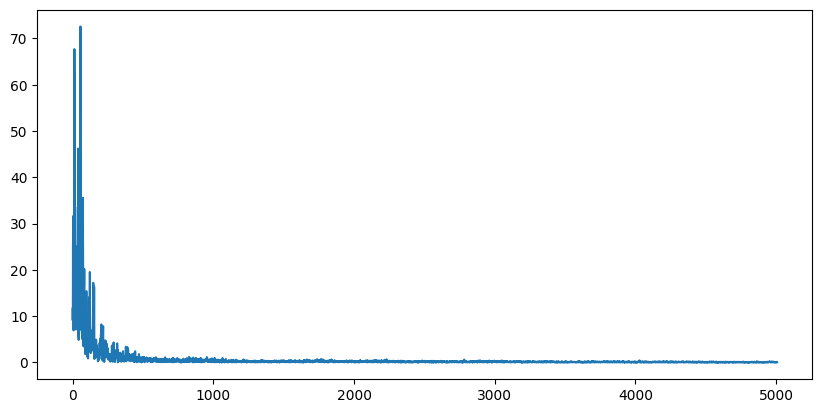

C:\Users\Alex\AppData\Local\Temp\ipykernel_30016\530209945.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read("sound_files/a.wav")


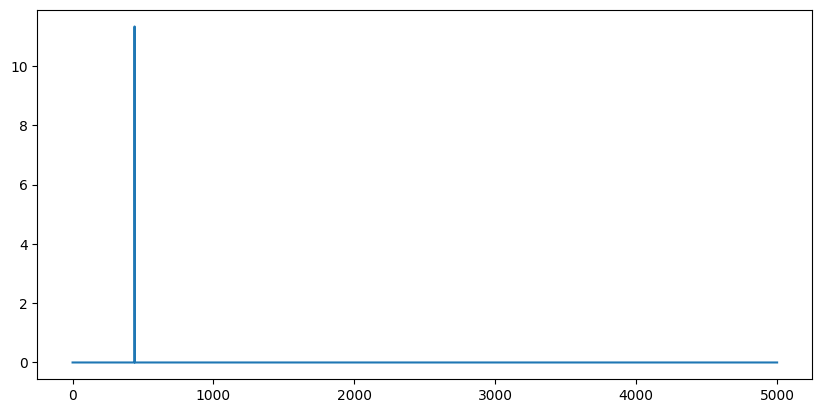

In [1]:
from scipy.io import wavfile
import pyaudio
import wave
import matplotlib.pyplot as plt

# record
stream = pyaudio.PyAudio().open(
    rate=44100, channels=1, format=pyaudio.paInt16, input=True, frames_per_buffer=1024
)
frames = []
for i in range(0, int(44100 / 1024 * 1)):
    data = stream.read(1024)
    frames.append(data)
stream.stop_stream()
stream.close()
pyaudio.PyAudio().terminate()

# save to wav
wf = wave.open("sound_files/recording.wav", "wb")
wf.setnchannels(1)
wf.setsampwidth(pyaudio.PyAudio().get_sample_size(pyaudio.paInt16))
wf.setframerate(44100)
wf.writeframes(b"".join(frames))
wf.close()

# recording
sample_rate, signal = wavfile.read("sound_files/recording.wav")
magnitudes, frequencies, line = plt.magnitude_spectrum(signal, sample_rate)
plt.close()
plt.figure().set_figwidth(10)
plt.plot(frequencies[:5000], magnitudes[:5000])
plt.show()

# a
sample_rate, signal = wavfile.read("sound_files/a.wav")
magnitudes, frequencies, line = plt.magnitude_spectrum(signal, sample_rate)
magnitudes = [i / 1000 for i in magnitudes]
plt.close()
plt.figure().set_figwidth(10)
plt.plot(frequencies[:25000], magnitudes[:25000])
plt.show()

In [2]:
import pygame
import pyaudio
import numpy as np
from math import sqrt

# pygame setup
pygame.init()
icon = pygame.Surface((1, 1))
icon.fill((255, 255, 255))
pygame.display.set_icon(icon)
pygame.display.set_caption("Image")
display_screen = pygame.display.Info()
window_width, window_height = (
    display_screen.current_w * 11 / 14,
    display_screen.current_h * 6 / 7,
)
canvas = pygame.display.set_mode((window_width, window_height), pygame.RESIZABLE)
canvas_width, canvas_height = (window_width - 200, window_height)

# pyaudio setup
p = pyaudio.PyAudio()
stream = p.open(
    format=pyaudio.paInt16, channels=1, rate=44100, input=True, frames_per_buffer=2048
)

clock = pygame.time.Clock()
running = True
while running:
    clock.tick(100)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # get data
    fft_array = np.fft.fft(np.frombuffer(stream.read(2048), dtype=np.int16), n=25000)
    fft_array = fft_array[range(len(fft_array) // 2)]

    canvas.fill((0, 0, 0))
    for i, v in enumerate(fft_array):
        magnitude = sqrt(v.real * v.real + v.imag * v.imag)

        if i % 10 == 0:
            pygame.draw.line(
                canvas, (0, 0, 255), (i//10, canvas_height), (i//10, canvas_height - magnitude)
            )

    pygame.display.flip()


pygame.quit()

pygame 2.5.2 (SDL 2.28.3, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
